In [51]:
import pandas as df
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_excel('Telco-Customer-Churn.xlsx')

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1. Compare chrun count with respect to gender


Values in each gender respect to Male and Female Male      3555
Female    3488
Name: gender, dtype: int64


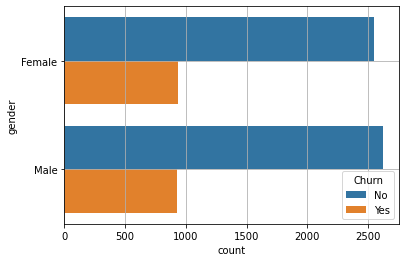

In [24]:
print("Values in each gender respect to Male and Female",data['gender'].value_counts())
sns.countplot(y='gender',hue='Churn',data=data)
plt.grid()

# 2.Find out how many female senior citizens,there in the data set


In [34]:
data_female = data.groupby('gender')['SeniorCitizen'].count()
data_female
a=data.groupby(['SeniorCitizen','gender']).size()
b=a.unstack()
print('Total Female senior citizens :',b['Female'].iloc[1])

Total Female senior citizens : 568


# 3.Compare 'tenure' with 'Total Charges' 


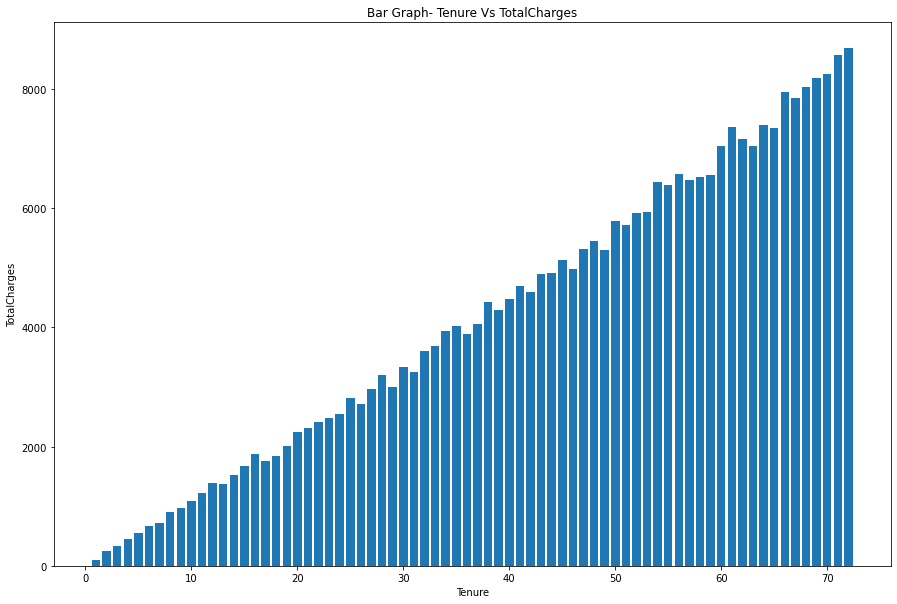

In [39]:
data["tenure"] = pd.to_numeric(data["tenure"], errors = 'coerce')
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = 'coerce')
x=data["tenure"] 
y=data["TotalCharges"]
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.title("Bar Graph- Tenure Vs TotalCharges")
plt.xlabel("Tenure")
plt.ylabel("TotalCharges")
plt.show()

# 4 Findout which contract preffered by the senior citizen.

Contract
 Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


<AxesSubplot:xlabel='Contract', ylabel='count'>

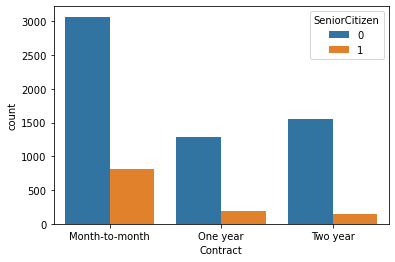

In [52]:
senior_contract = data.groupby(['Contract', 'SeniorCitizen']).size().reset_index().pivot(columns='Contract', index='SeniorCitizen', values=0)
senior_contract
data['Contract'].unique()
# Value Count and visualization
print("Contract\n",data["Contract"].value_counts())
# Contract Wise Churn Rate
sns.countplot(x="Contract",hue="SeniorCitizen",data=data)

# 5comment your finding in payment

In [53]:
data["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Payment method in each gender 
 Male      3555
Female    3488
Name: gender, dtype: int64


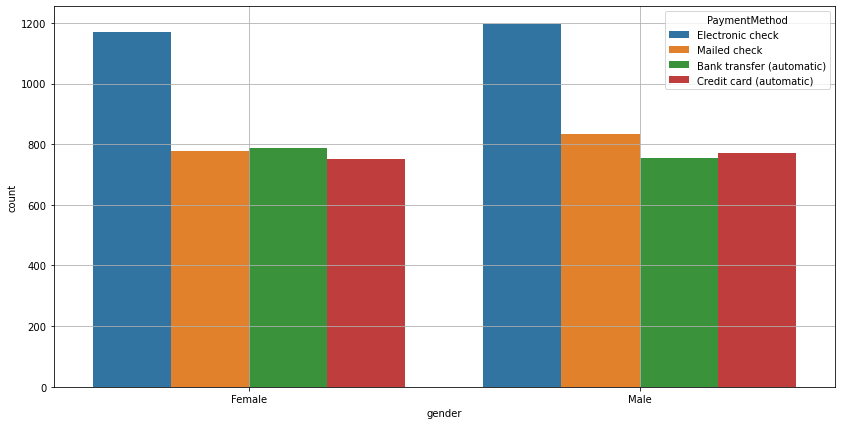

In [55]:
print("Payment method in each gender \n",data['gender'].value_counts())
plt.figure(figsize=(14,7))
sns.countplot(data=data,x='gender',hue='PaymentMethod') 
plt.grid()

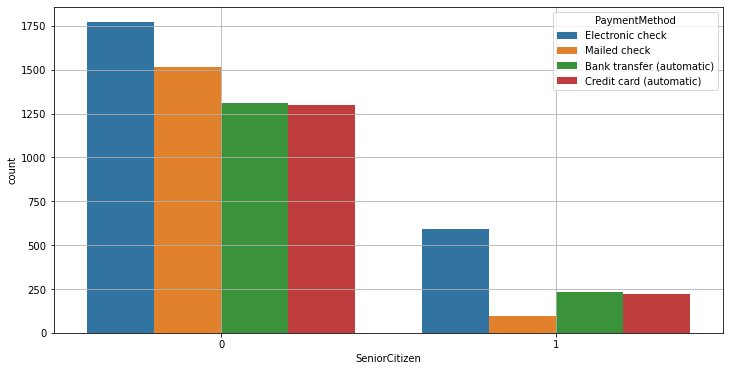

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='SeniorCitizen',hue='PaymentMethod') 
plt.grid()

In [ ]:
#Mostly people prefer electronic check.
#the second graph shows that Credit Card is the least popular among both male and female population.
#Senior citizens mostly prefer Electronic Check
#Senior citizens least preferred payment mode is Mailed Check
The payment method of 'Mailed Check' is prominent among non-SeniorCitizens, but it is very less preferred by SeniorCitizens